In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
train_clientes = pd.read_csv('_data/train_clientes.csv')
train_requerimientos = pd.read_csv('_data/train_requerimientos.csv')
test_clientes = pd.read_csv('_data/test_clientes.csv')
test_requerimientos = pd.read_csv('_data/test_requerimientos.csv')

In [3]:
train = pd.read_csv('_data/train_merge.csv')
test = pd.read_csv('_data/test_merge.csv')

In [4]:
results = pd.read_csv('_data/results.csv')
results

,model,accuracy,accuracy-std,f1-score,f1-score-std,aucroc,aucroc-std,logloss,logloss-std,time
0,XGBClassifier,0.872071,0.000393,0.413881,0.004304,0.635150,0.002001,4.418511,0.013572,24861
1,LGBMClassifier,0.876386,0.001123,0.481487,0.007929,0.670094,0.005204,4.269507,0.038777,1674
2,CatBoostClassifier,0.879357,0.000520,0.482438,0.006846,0.668718,0.003847,4.166874,0.017965,144761
3,TESTING_PARAMS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,XGBClassifier,0.880171,0.000859,0.484674,0.003495,0.669501,0.002300,4.138749,0.029675,31504
5,XGBClassifier,0.874900,0.001844,0.535230,0.003263,0.707799,0.001611,4.320834,0.063708,113529
6,FULL_DATASET,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
7,XGBClassifier,0.872129,0.001760,0.411888,0.012084,0.634202,0.005446,4.416538,0.060778,186127
8,LGBMClassifier,0.877229,0.002107,0.474719,0.009287,0.665458,0.004575,4.240392,0.072760,9602


In [7]:
train.shape

(70000, 85)

In [139]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',150)

In [10]:
train.head()

,ID_CORRELATIVO,FLG_BANCARIZADO,RANG_INGRESO,FLAG_LIMA_PROVINCIA,EDAD,ANTIGUEDAD,ATTRITION,RANG_SDO_PASIVO_MENOS0,SDO_ACTIVO_MENOS0,SDO_ACTIVO_MENOS1,SDO_ACTIVO_MENOS2,SDO_ACTIVO_MENOS3,SDO_ACTIVO_MENOS4,SDO_ACTIVO_MENOS5,FLG_SEGURO_MENOS0,FLG_SEGURO_MENOS1,FLG_SEGURO_MENOS2,FLG_SEGURO_MENOS3,FLG_SEGURO_MENOS4,FLG_SEGURO_MENOS5,RANG_NRO_PRODUCTOS_MENOS0,FLG_NOMINA,NRO_ACCES_CANAL1_MENOS0,NRO_ACCES_CANAL1_MENOS1,NRO_ACCES_CANAL1_MENOS2,NRO_ACCES_CANAL1_MENOS3,NRO_ACCES_CANAL1_MENOS4,NRO_ACCES_CANAL1_MENOS5,NRO_ACCES_CANAL2_MENOS0,NRO_ACCES_CANAL2_MENOS1,NRO_ACCES_CANAL2_MENOS2,NRO_ACCES_CANAL2_MENOS3,NRO_ACCES_CANAL2_MENOS4,NRO_ACCES_CANAL2_MENOS5,NRO_ACCES_CANAL3_MENOS0,NRO_ACCES_CANAL3_MENOS1,NRO_ACCES_CANAL3_MENOS2,NRO_ACCES_CANAL3_MENOS3,NRO_ACCES_CANAL3_MENOS4,NRO_ACCES_CANAL3_MENOS5,NRO_ENTID_SSFF_MENOS0,NRO_ENTID_SSFF_MENOS1,NRO_ENTID_SSFF_MENOS2,NRO_ENTID_SSFF_MENOS3,NRO_ENTID_SSFF_MENOS4,NRO_ENTID_SSFF_MENOS5,FLG_SDO_OTSSFF_MENOS0,FLG_SDO_OTSSFF_MENOS1,FLG_SDO_OTSSFF_MENOS2,FLG_SDO_OTSSFF_MENOS3,FLG_SDO_OTSSFF_MENOS4,FLG_SDO_OTSSFF_MENOS5,TIPO_REQUERIMIENTO2-Reclamo,TIPO_REQUERIMIENTO2-Solicitud,DICTAMEN-NO PROCEDE,DICTAMEN-PROCEDE TOTAL,DICTAMEN-PROCEDE PARCIAL,PRODUCTO_SERVICIO_2-Producto 20,PRODUCTO_SERVICIO_2-Producto 17,PRODUCTO_SERVICIO_2-Producto 07,PRODUCTO_SERVICIO_2-Producto 18,PRODUCTO_SERVICIO_2-Producto 21,PRODUCTO_SERVICIO_2-Producto 01,PRODUCTO_SERVICIO_2-Producto 05,PRODUCTO_SERVICIO_2-Producto 22,PRODUCTO_SERVICIO_2-Producto 06,PRODUCTO_SERVICIO_2-Producto 10,PRODUCTO_SERVICIO_2-Producto 03,PRODUCTO_SERVICIO_2-Producto 04,PRODUCTO_SERVICIO_2-Producto 08,PRODUCTO_SERVICIO_2-Producto 14,PRODUCTO_SERVICIO_2-Producto 12,PRODUCTO_SERVICIO_2-Producto 09,PRODUCTO_SERVICIO_2-Producto 11,PRODUCTO_SERVICIO_2-Producto 02,PRODUCTO_SERVICIO_2-Producto 13,PRODUCTO_SERVICIO_2-Producto 23,PRODUCTO_SERVICIO_2-Producto 16,PRODUCTO_SERVICIO_2-Producto 15,CODMES-201206,CODMES-201205,CODMES-201208,CODMES-201204,CODMES-201203,CODMES-201207
0,35653,1,5,0,25.0,6.0,0,9,0,0,0,0,0,0,1,1,1,1,1,1,3,0,2,1,0,2,4,1,8,11,14,12,8,12,3,0,1,6,2,5,2,1,1,1,1,1,1,0,0,0,0,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,66575,1,2,1,27.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,24,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,56800,1,0,1,34.0,4.0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,8410,1,3,1,63.0,5.0,0,3,0,0,0,0,0,0,1,1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,0,3,3,3,3,3,3,1,1,1,1,1,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,6853,1,-1,0,25.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
null_cols = [column for column in train.columns if train[column].isnull().sum()>0]

In [31]:
for col in null_cols:
    train[f'{col}-isnull'] = train[col].isnull().astype(int)
    test[f'{col}-isnull'] = test[col].isnull().astype(int)

In [32]:
train.head()

,ID_CORRELATIVO,FLG_BANCARIZADO,RANG_INGRESO,FLAG_LIMA_PROVINCIA,EDAD,ANTIGUEDAD,ATTRITION,RANG_SDO_PASIVO_MENOS0,SDO_ACTIVO_MENOS0,SDO_ACTIVO_MENOS1,SDO_ACTIVO_MENOS2,SDO_ACTIVO_MENOS3,SDO_ACTIVO_MENOS4,SDO_ACTIVO_MENOS5,FLG_SEGURO_MENOS0,FLG_SEGURO_MENOS1,FLG_SEGURO_MENOS2,FLG_SEGURO_MENOS3,FLG_SEGURO_MENOS4,FLG_SEGURO_MENOS5,RANG_NRO_PRODUCTOS_MENOS0,FLG_NOMINA,NRO_ACCES_CANAL1_MENOS0,NRO_ACCES_CANAL1_MENOS1,NRO_ACCES_CANAL1_MENOS2,NRO_ACCES_CANAL1_MENOS3,NRO_ACCES_CANAL1_MENOS4,NRO_ACCES_CANAL1_MENOS5,NRO_ACCES_CANAL2_MENOS0,NRO_ACCES_CANAL2_MENOS1,NRO_ACCES_CANAL2_MENOS2,NRO_ACCES_CANAL2_MENOS3,NRO_ACCES_CANAL2_MENOS4,NRO_ACCES_CANAL2_MENOS5,NRO_ACCES_CANAL3_MENOS0,NRO_ACCES_CANAL3_MENOS1,NRO_ACCES_CANAL3_MENOS2,NRO_ACCES_CANAL3_MENOS3,NRO_ACCES_CANAL3_MENOS4,NRO_ACCES_CANAL3_MENOS5,NRO_ENTID_SSFF_MENOS0,NRO_ENTID_SSFF_MENOS1,NRO_ENTID_SSFF_MENOS2,NRO_ENTID_SSFF_MENOS3,NRO_ENTID_SSFF_MENOS4,NRO_ENTID_SSFF_MENOS5,FLG_SDO_OTSSFF_MENOS0,FLG_SDO_OTSSFF_MENOS1,FLG_SDO_OTSSFF_MENOS2,FLG_SDO_OTSSFF_MENOS3,FLG_SDO_OTSSFF_MENOS4,FLG_SDO_OTSSFF_MENOS5,TIPO_REQUERIMIENTO2-Reclamo,TIPO_REQUERIMIENTO2-Solicitud,DICTAMEN-NO PROCEDE,DICTAMEN-PROCEDE TOTAL,DICTAMEN-PROCEDE PARCIAL,PRODUCTO_SERVICIO_2-Producto 20,PRODUCTO_SERVICIO_2-Producto 17,PRODUCTO_SERVICIO_2-Producto 07,PRODUCTO_SERVICIO_2-Producto 18,PRODUCTO_SERVICIO_2-Producto 21,PRODUCTO_SERVICIO_2-Producto 01,PRODUCTO_SERVICIO_2-Producto 05,PRODUCTO_SERVICIO_2-Producto 22,PRODUCTO_SERVICIO_2-Producto 06,PRODUCTO_SERVICIO_2-Producto 10,PRODUCTO_SERVICIO_2-Producto 03,PRODUCTO_SERVICIO_2-Producto 04,PRODUCTO_SERVICIO_2-Producto 08,PRODUCTO_SERVICIO_2-Producto 14,PRODUCTO_SERVICIO_2-Producto 12,PRODUCTO_SERVICIO_2-Producto 09,PRODUCTO_SERVICIO_2-Producto 11,PRODUCTO_SERVICIO_2-Producto 02,PRODUCTO_SERVICIO_2-Producto 13,PRODUCTO_SERVICIO_2-Producto 23,PRODUCTO_SERVICIO_2-Producto 16,PRODUCTO_SERVICIO_2-Producto 15,CODMES-201206,CODMES-201205,CODMES-201208,CODMES-201204,CODMES-201203,CODMES-201207,EDAD-isnull,ANTIGUEDAD-isnull,TIPO_REQUERIMIENTO2-Reclamo-isnull,TIPO_REQUERIMIENTO2-Solicitud-isnull,DICTAMEN-NO PROCEDE-isnull,DICTAMEN-PROCEDE TOTAL-isnull,DICTAMEN-PROCEDE PARCIAL-isnull,PRODUCTO_SERVICIO_2-Producto 20-isnull,PRODUCTO_SERVICIO_2-Producto 17-isnull,PRODUCTO_SERVICIO_2-Producto 07-isnull,PRODUCTO_SERVICIO_2-Producto 18-isnull,PRODUCTO_SERVICIO_2-Producto 21-isnull,PRODUCTO_SERVICIO_2-Producto 01-isnull,PRODUCTO_SERVICIO_2-Producto 05-isnull,PRODUCTO_SERVICIO_2-Producto 22-isnull,PRODUCTO_SERVICIO_2-Producto 06-isnull,PRODUCTO_SERVICIO_2-Producto 10-isnull,PRODUCTO_SERVICIO_2-Producto 03-isnull,PRODUCTO_SERVICIO_2-Producto 04-isnull,PRODUCTO_SERVICIO_2-Producto 08-isnull,PRODUCTO_SERVICIO_2-Producto 14-isnull,PRODUCTO_SERVICIO_2-Producto 12-isnull,PRODUCTO_SERVICIO_2-Producto 09-isnull,PRODUCTO_SERVICIO_2-Producto 11-isnull,PRODUCTO_SERVICIO_2-Producto 02-isnull,PRODUCTO_SERVICIO_2-Producto 13-isnull,PRODUCTO_SERVICIO_2-Producto 23-isnull,PRODUCTO_SERVICIO_2-Producto 16-isnull,PRODUCTO_SERVICIO_2-Producto 15-isnull,CODMES-201206-isnull,CODMES-201205-isnull,CODMES-201208-isnull,CODMES-201204-isnull,CODMES-201203-isnull,CODMES-201207-isnull
0,35653,1,5,0,25.0,6.0,0,9,0,0,0,0,0,0,1,1,1,1,1,1,3,0,2,1,0,2,4,1,8,11,14,12,8,12,3,0,1,6,2,5,2,1,1,1,1,1,1,0,0,0,0,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,66575,1,2,1,27.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,24,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,56800,1,0,1,34.0,4.0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [33]:
# average mean and median
fill_EDAD = (train['EDAD'].dropna().mean() + test['EDAD'].dropna().median())/2
train['EDAD'] = train['EDAD'].fillna(fill_EDAD)
test['EDAD'] = test['EDAD'].fillna(fill_EDAD)

In [34]:
# average mean and median
fill_ANTIGUEDAD = (train['ANTIGUEDAD'].dropna().mean() + test['ANTIGUEDAD'].dropna().median())/2
train['ANTIGUEDAD'] = train['ANTIGUEDAD'].fillna(fill_ANTIGUEDAD)
test['ANTIGUEDAD'] = test['ANTIGUEDAD'].fillna(fill_ANTIGUEDAD)

In [40]:
train = train.fillna(0)
test = test.fillna(0)

In [44]:
train.to_csv('_data/train_full.csv', index=None)
test.to_csv('_data/test_full.csv', index=None)

In [9]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import time
import winsound

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, log_loss
from sklearn.model_selection import StratifiedKFold

In [10]:
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [11]:
def run_model(model, X, y):
    model_name = str(model.__class__).split('.')[-1].replace('>','').replace("'",'')
    print(model_name)
    accuracy = []
    f1 = []
    auc = []
    logloss = []
    start = int(time.time() * 1000)
    for train_idx, test_idx in kfolds.split(X, y):
        model.fit(X.iloc[train_idx,:], y[train_idx])
        y_ = model.predict_proba(X.iloc[test_idx,:])
        accuracy += [accuracy_score(y.iloc[test_idx], y_)]
        f1 += [f1_score(y.iloc[test_idx], y_)]
        auc += [roc_auc_score(y.iloc[test_idx], y_)]
        logloss += [log_loss(y.iloc[test_idx], y_)]
    end = int(time.time() * 1000)
    results.loc[len(results)] = [model_name, np.mean(accuracy), np.std(accuracy), 
                                 np.mean(f1), np.std(f1),
                                 np.mean(auc), np.std(auc), 
                                 np.mean(logloss), np.std(logloss), str(end - start)]
    winsound.Beep(2500, 1000)

In [52]:
results.loc[len(results)] = ['NONULLS_DATASET'] + [0] * 9
results

,model,accuracy,accuracy-std,f1-score,f1-score-std,aucroc,aucroc-std,logloss,logloss-std,time
0,XGBClassifier,0.872071,0.000393,0.413881,0.004304,0.635150,0.002001,4.418511,0.013572,24861
1,LGBMClassifier,0.876386,0.001123,0.481487,0.007929,0.670094,0.005204,4.269507,0.038777,1674
2,CatBoostClassifier,0.879357,0.000520,0.482438,0.006846,0.668718,0.003847,4.166874,0.017965,144761
3,TESTING_PARAMS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,XGBClassifier,0.880171,0.000859,0.484674,0.003495,0.669501,0.002300,4.138749,0.029675,31504
5,XGBClassifier,0.874900,0.001844,0.535230,0.003263,0.707799,0.001611,4.320834,0.063708,113529
6,FULL_DATASET,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
7,XGBClassifier,0.872129,0.001760,0.411888,0.012084,0.634202,0.005446,4.416538,0.060778,186127
8,LGBMClassifier,0.877229,0.002107,0.474719,0.009287,0.665458,0.004575,4.240392,0.072760,9602
9,NONULLS_DATASET,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [53]:
run_model(XGBClassifier(), train.drop(['ID_CORRELATIVO', 'ATTRITION'], axis=1), train['ATTRITION'])
results

XGBClassifier


,model,accuracy,accuracy-std,f1-score,f1-score-std,aucroc,aucroc-std,logloss,logloss-std,time
0,XGBClassifier,0.872071,0.000393,0.413881,0.004304,0.635150,0.002001,4.418511,0.013572,24861
1,LGBMClassifier,0.876386,0.001123,0.481487,0.007929,0.670094,0.005204,4.269507,0.038777,1674
2,CatBoostClassifier,0.879357,0.000520,0.482438,0.006846,0.668718,0.003847,4.166874,0.017965,144761
3,TESTING_PARAMS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,XGBClassifier,0.880171,0.000859,0.484674,0.003495,0.669501,0.002300,4.138749,0.029675,31504
5,XGBClassifier,0.874900,0.001844,0.535230,0.003263,0.707799,0.001611,4.320834,0.063708,113529
6,FULL_DATASET,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
7,XGBClassifier,0.872129,0.001760,0.411888,0.012084,0.634202,0.005446,4.416538,0.060778,186127
8,LGBMClassifier,0.877229,0.002107,0.474719,0.009287,0.665458,0.004575,4.240392,0.072760,9602
9,NONULLS_DATASET,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [54]:
run_model(LGBMClassifier(), train.drop(['ID_CORRELATIVO', 'ATTRITION'], axis=1), train['ATTRITION'])
results

LGBMClassifier


,model,accuracy,accuracy-std,f1-score,f1-score-std,aucroc,aucroc-std,logloss,logloss-std,time
0,XGBClassifier,0.872071,0.000393,0.413881,0.004304,0.635150,0.002001,4.418511,0.013572,24861
1,LGBMClassifier,0.876386,0.001123,0.481487,0.007929,0.670094,0.005204,4.269507,0.038777,1674
2,CatBoostClassifier,0.879357,0.000520,0.482438,0.006846,0.668718,0.003847,4.166874,0.017965,144761
3,TESTING_PARAMS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,XGBClassifier,0.880171,0.000859,0.484674,0.003495,0.669501,0.002300,4.138749,0.029675,31504
5,XGBClassifier,0.874900,0.001844,0.535230,0.003263,0.707799,0.001611,4.320834,0.063708,113529
6,FULL_DATASET,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
7,XGBClassifier,0.872129,0.001760,0.411888,0.012084,0.634202,0.005446,4.416538,0.060778,186127
8,LGBMClassifier,0.877229,0.002107,0.474719,0.009287,0.665458,0.004575,4.240392,0.072760,9602
9,NONULLS_DATASET,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [58]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('ATTRITION', axis=1), train['ATTRITION'], 
                                                    test_size=0.2, stratify=train['ATTRITION'])

In [59]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56000, 119), (14000, 119), (56000,), (14000,))

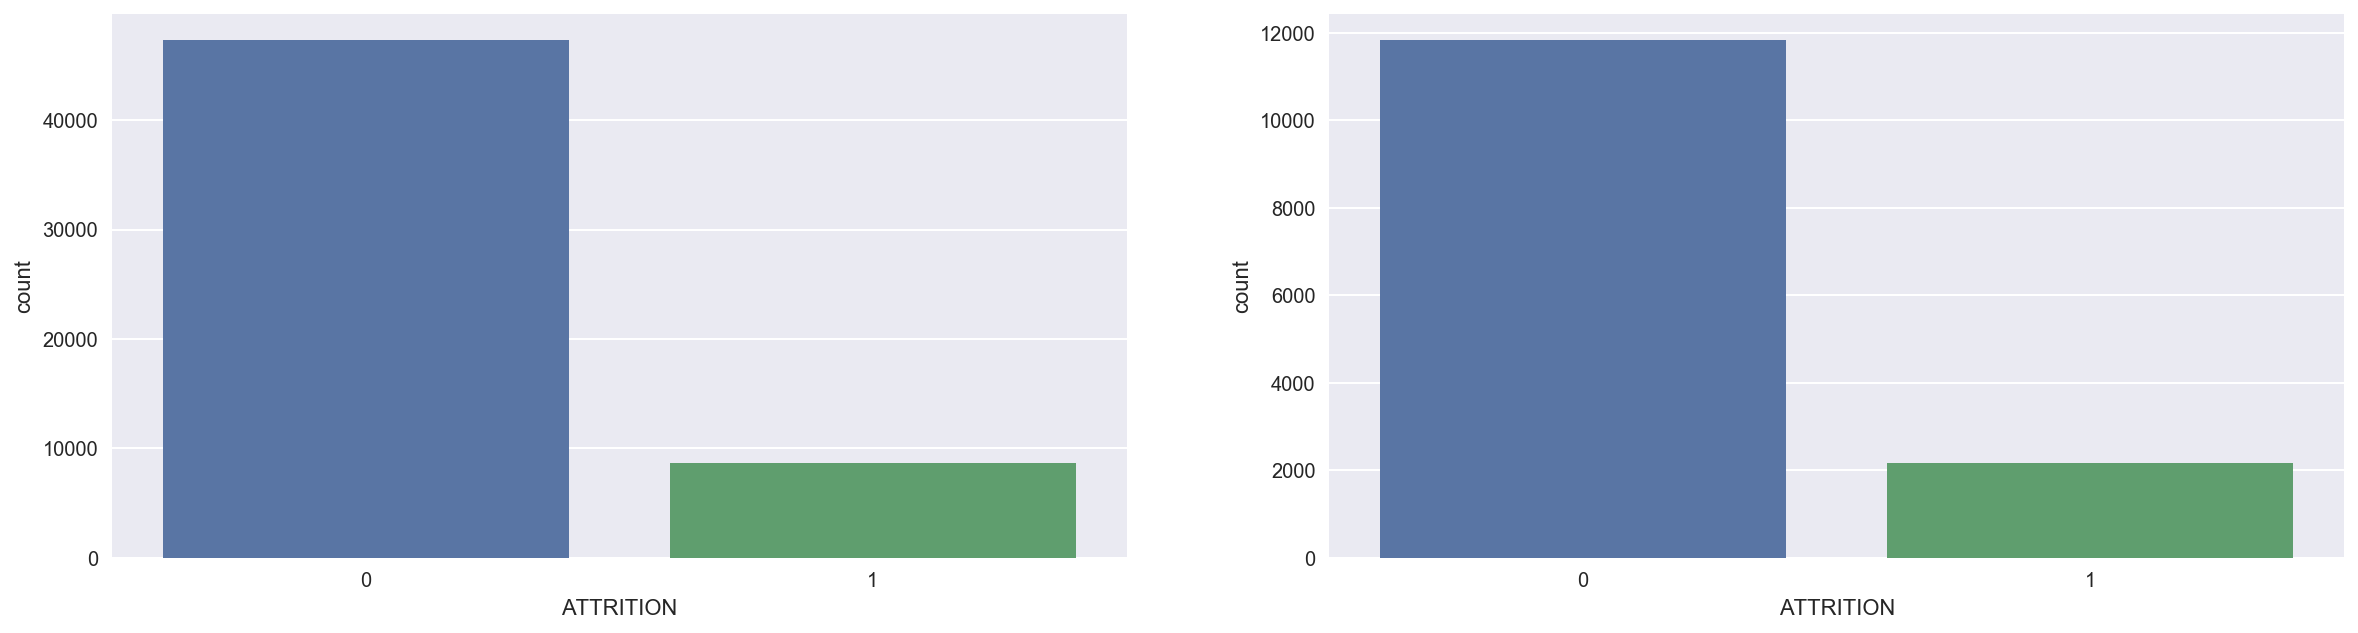

In [111]:
plt.subplots(ncols=2, figsize=(20,5))
plt.subplot(121)
sns.countplot(x=y_train)
plt.subplot(122)
sns.countplot(x=y_test)

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [116]:
X_train_churn = X_train[y_train==1]
y_train_churn = y_train[y_train==1]
X_train_no_churn = X_train[y_train==0]
y_train_no_churn = y_train[y_train==0]

In [123]:
X_train_churn.shape, X_train_no_churn.shape, y_train_churn.shape, y_train_no_churn.shape

((8658, 119), (47342, 119), (8658,), (47342,))

In [134]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
# xgb.fit(np.vstack((X_train_churn, X_train_no_churn[:10000])), 
#         np.concatenate((y_train_churn, y_train_no_churn[:10000])))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [135]:
y_train_pred = xgb.predict(X_train)
print(accuracy_score(y_train, y_train_pred))
print(f1_score(y_train, y_train_pred))
print(roc_auc_score(y_train, y_train_pred))
print(log_loss(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.872625
0.413452841049
0.634738374599
4.39939076476


array([[46353,   989],
       [ 6144,  2514]], dtype=int64)

In [136]:
y_test_pred = xgb.predict(X_test)
print(accuracy_score(y_test, y_test_pred))
print(f1_score(y_test, y_test_pred))
print(roc_auc_score(y_test, y_test_pred))
print(log_loss(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.871428571429
0.40906106369
0.633005199214
4.44071461476


array([[11577,   259],
       [ 1541,   623]], dtype=int64)

##### > Conclusion: underfitting

## Outlier clipping

In [147]:
train = pd.read_csv('_data/train_full.csv')
test = pd.read_csv('_data/test_full.csv')

In [148]:
train.describe(percentiles=[.01, 0.25, 0.50, 0.75, 0.99]).transpose()

,count,mean,std,min,1%,25%,50%,75%,99%,max
ID_CORRELATIVO,70000.0,49922.740729,28896.279736,1.0,959.98,24958.75,49972.5,74948.75,98966.01,100000.0
FLG_BANCARIZADO,70000.0,0.839043,0.367494,0.0,0.00,1.00,1.0,1.00,1.00,1.0
RANG_INGRESO,70000.0,1.767600,2.207242,-1.0,-1.00,0.00,1.0,3.00,8.00,8.0
FLAG_LIMA_PROVINCIA,70000.0,0.308443,0.556824,-1.0,-1.00,0.00,0.0,1.00,1.00,1.0
EDAD,70000.0,35.109501,11.096763,18.0,21.00,27.00,33.0,40.00,70.00,98.0
ANTIGUEDAD,70000.0,2.517199,3.171116,0.0,0.00,0.00,1.0,5.00,10.00,23.0
ATTRITION,70000.0,0.154600,0.361526,0.0,0.00,0.00,0.0,0.00,1.00,1.0
RANG_SDO_PASIVO_MENOS0,70000.0,2.762586,3.376407,0.0,0.00,1.00,1.0,4.00,14.00,14.0
SDO_ACTIVO_MENOS0,70000.0,9650.613286,99710.661676,0.0,0.00,0.00,0.0,0.00,239832.10,11348500.0
SDO_ACTIVO_MENOS1,70000.0,9389.333714,98936.962773,0.0,0.00,0.00,0.0,0.00,232460.40,11289560.0


In [158]:
for column in test.columns[1:]:
    q01 = train[column].quantile(0.01)
    q99 = train[column].quantile(0.99)
    train[column] = train[column].apply(lambda x: np.clip(x, q01, q99))
    test[column] = test[column].apply(lambda x: np.clip(x, q01, q99))

In [160]:
train.describe(percentiles=[.01, 0.25, 0.50, 0.75, 0.99]).transpose()

,count,mean,std,min,1%,25%,50%,75%,99%,max
ID_CORRELATIVO,70000.0,49922.740729,28896.279736,1.0,959.98,24958.75,49972.5,74948.75,98966.01000,100000.000
FLG_BANCARIZADO,70000.0,0.839043,0.367494,0.0,0.00,1.00,1.0,1.00,1.00000,1.000
RANG_INGRESO,70000.0,1.767600,2.207242,-1.0,-1.00,0.00,1.0,3.00,8.00000,8.000
FLAG_LIMA_PROVINCIA,70000.0,0.308443,0.556824,-1.0,-1.00,0.00,0.0,1.00,1.00000,1.000
EDAD,70000.0,35.057673,10.847235,21.0,21.00,27.00,33.0,40.00,70.00000,70.000
ANTIGUEDAD,70000.0,2.515613,3.165204,0.0,0.00,0.00,1.0,5.00,10.00000,10.000
ATTRITION,70000.0,0.154600,0.361526,0.0,0.00,0.00,0.0,0.00,1.00000,1.000
RANG_SDO_PASIVO_MENOS0,70000.0,2.762586,3.376407,0.0,0.00,1.00,1.0,4.00,14.00000,14.000
SDO_ACTIVO_MENOS0,70000.0,6084.876924,29431.925055,0.0,0.00,0.00,0.0,0.00,239830.00021,239830.021
SDO_ACTIVO_MENOS1,70000.0,5820.464754,28555.657767,0.0,0.00,0.00,0.0,0.00,232460.00004,232460.004


In [164]:
train.shape, test.shape

((70000, 120), (30000, 119))

In [165]:
for col in test.columns[1:]:
    if train[col].sum() == 0:
        train = train.drop(col, axis=1)
        test = test.drop(col, axis=1)

In [166]:
train.shape, test.shape

((70000, 105), (30000, 104))

In [167]:
train.to_csv('_data/train_clipped.csv', index=False)
test.to_csv('_data/test_clipped.csv', index=False)

## Normalization

In [168]:
from sklearn.preprocessing import MinMaxScaler

In [169]:
sc = MinMaxScaler()

In [170]:
train_norm = sc.fit_transform(train.drop(['ID_CORRELATIVO', 'ATTRITION'], axis=1))

In [174]:
train[train.drop(['ID_CORRELATIVO', 'ATTRITION'], axis=1).columns] = train_norm

In [176]:
test_norm = sc.transform(test.drop('ID_CORRELATIVO', axis=1))

In [177]:
test[test.drop('ID_CORRELATIVO', axis=1).columns] = test_norm

In [180]:
train.to_csv('_data/train_norm.csv', index=False)
test.to_csv('_data/test_norm.csv', index=False)

## Checkpoint

In [5]:
train = pd.read_csv('_data/train_norm.csv')
test = pd.read_csv('_data/test_norm.csv')

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC

In [12]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('ATTRITION', axis=1), train['ATTRITION'], 
                                                    test_size=0.2, stratify=train['ATTRITION'])

In [19]:
xgb = CatBoostClassifier()
xgb.fit(X_train, y_train)
# xgb.fit(np.vstack((X_train_churn, X_train_no_churn[:10000])), 
#         np.concatenate((y_train_churn, y_train_no_churn[:10000])))

In [20]:
y_train_pred = xgb.predict_proba(X_train)[:,1]
# print(accuracy_score(y_train, y_train_pred))
# print(f1_score(y_train, y_train_pred))
print(roc_auc_score(y_train, y_train_pred))
print(log_loss(y_train, y_train_pred))
# confusion_matrix(y_train, y_train_pred)

0.87280047325
0.289666455241


In [21]:
y_test_pred = xgb.predict_proba(X_test)[:,1]
# print(accuracy_score(y_test, y_test_pred))
# print(f1_score(y_test, y_test_pred))
print(roc_auc_score(y_test, y_test_pred))
print(log_loss(y_test, y_test_pred))
# confusion_matrix(y_test, y_test_pred)

0.857286293766
0.302406657185


In [185]:
results.loc[len(results)] = ['NORMALIZED'] + [0] * 9
results

,model,accuracy,accuracy-std,f1-score,f1-score-std,aucroc,aucroc-std,logloss,logloss-std,time
0,XGBClassifier,0.872071,0.000393,0.413881,0.004304,0.635150,0.002001,4.418511,0.013572,24861
1,LGBMClassifier,0.876386,0.001123,0.481487,0.007929,0.670094,0.005204,4.269507,0.038777,1674
2,CatBoostClassifier,0.879357,0.000520,0.482438,0.006846,0.668718,0.003847,4.166874,0.017965,144761
3,TESTING_PARAMS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,XGBClassifier,0.880171,0.000859,0.484674,0.003495,0.669501,0.002300,4.138749,0.029675,31504
5,XGBClassifier,0.874900,0.001844,0.535230,0.003263,0.707799,0.001611,4.320834,0.063708,113529
6,FULL_DATASET,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
7,XGBClassifier,0.872129,0.001760,0.411888,0.012084,0.634202,0.005446,4.416538,0.060778,186127
8,LGBMClassifier,0.877229,0.002107,0.474719,0.009287,0.665458,0.004575,4.240392,0.072760,9602
9,NONULLS_DATASET,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [186]:
run_model(XGBClassifier(), train.drop(['ID_CORRELATIVO', 'ATTRITION'], axis=1), train['ATTRITION'])
results

XGBClassifier


,model,accuracy,accuracy-std,f1-score,f1-score-std,aucroc,aucroc-std,logloss,logloss-std,time
0,XGBClassifier,0.872071,0.000393,0.413881,0.004304,0.635150,0.002001,4.418511,0.013572,24861
1,LGBMClassifier,0.876386,0.001123,0.481487,0.007929,0.670094,0.005204,4.269507,0.038777,1674
2,CatBoostClassifier,0.879357,0.000520,0.482438,0.006846,0.668718,0.003847,4.166874,0.017965,144761
3,TESTING_PARAMS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,XGBClassifier,0.880171,0.000859,0.484674,0.003495,0.669501,0.002300,4.138749,0.029675,31504
5,XGBClassifier,0.874900,0.001844,0.535230,0.003263,0.707799,0.001611,4.320834,0.063708,113529
6,FULL_DATASET,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
7,XGBClassifier,0.872129,0.001760,0.411888,0.012084,0.634202,0.005446,4.416538,0.060778,186127
8,LGBMClassifier,0.877229,0.002107,0.474719,0.009287,0.665458,0.004575,4.240392,0.072760,9602
9,NONULLS_DATASET,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [187]:
run_model(LGBMClassifier(), train.drop(['ID_CORRELATIVO', 'ATTRITION'], axis=1), train['ATTRITION'])
results

LGBMClassifier


,model,accuracy,accuracy-std,f1-score,f1-score-std,aucroc,aucroc-std,logloss,logloss-std,time
0,XGBClassifier,0.872071,0.000393,0.413881,0.004304,0.635150,0.002001,4.418511,0.013572,24861
1,LGBMClassifier,0.876386,0.001123,0.481487,0.007929,0.670094,0.005204,4.269507,0.038777,1674
2,CatBoostClassifier,0.879357,0.000520,0.482438,0.006846,0.668718,0.003847,4.166874,0.017965,144761
3,TESTING_PARAMS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,XGBClassifier,0.880171,0.000859,0.484674,0.003495,0.669501,0.002300,4.138749,0.029675,31504
5,XGBClassifier,0.874900,0.001844,0.535230,0.003263,0.707799,0.001611,4.320834,0.063708,113529
6,FULL_DATASET,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
7,XGBClassifier,0.872129,0.001760,0.411888,0.012084,0.634202,0.005446,4.416538,0.060778,186127
8,LGBMClassifier,0.877229,0.002107,0.474719,0.009287,0.665458,0.004575,4.240392,0.072760,9602
9,NONULLS_DATASET,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


## Submission

In [23]:
train.head()

,ID_CORRELATIVO,FLG_BANCARIZADO,RANG_INGRESO,FLAG_LIMA_PROVINCIA,EDAD,ANTIGUEDAD,ATTRITION,RANG_SDO_PASIVO_MENOS0,SDO_ACTIVO_MENOS0,SDO_ACTIVO_MENOS1,...,PRODUCTO_SERVICIO_2-Producto 13-isnull,PRODUCTO_SERVICIO_2-Producto 23-isnull,PRODUCTO_SERVICIO_2-Producto 16-isnull,PRODUCTO_SERVICIO_2-Producto 15-isnull,CODMES-201206-isnull,CODMES-201205-isnull,CODMES-201208-isnull,CODMES-201204-isnull,CODMES-201203-isnull,CODMES-201207-isnull
0,35653,1.0,0.666667,0.5,0.081633,0.6,0,0.642857,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,66575,1.0,0.333333,1.0,0.122449,0.0,0,0.071429,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,56800,1.0,0.111111,1.0,0.265306,0.4,0,0.142857,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8410,1.0,0.444444,1.0,0.857143,0.5,0,0.214286,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6853,1.0,0.000000,0.5,0.081633,0.0,0,0.071429,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [24]:
xgb = CatBoostClassifier()
xgb.fit(train.drop(['ID_CORRELATIVO', 'ATTRITION'], axis=1), train['ATTRITION'])

In [26]:
test.head()

,ID_CORRELATIVO,FLG_BANCARIZADO,RANG_INGRESO,FLAG_LIMA_PROVINCIA,EDAD,ANTIGUEDAD,RANG_SDO_PASIVO_MENOS0,SDO_ACTIVO_MENOS0,SDO_ACTIVO_MENOS1,SDO_ACTIVO_MENOS2,...,PRODUCTO_SERVICIO_2-Producto 13-isnull,PRODUCTO_SERVICIO_2-Producto 23-isnull,PRODUCTO_SERVICIO_2-Producto 16-isnull,PRODUCTO_SERVICIO_2-Producto 15-isnull,CODMES-201206-isnull,CODMES-201205-isnull,CODMES-201208-isnull,CODMES-201204-isnull,CODMES-201203-isnull,CODMES-201207-isnull
0,47411,0.0,0.333333,0.0,0.257474,0.0,0.071429,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,39861,1.0,0.333333,1.0,0.326531,0.0,0.071429,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,38898,1.0,0.444444,0.5,0.102041,0.4,0.285714,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50927,1.0,0.222222,0.5,0.265306,0.4,0.500000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32969,1.0,0.333333,0.5,0.020408,0.2,0.071429,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
y_test_pred = xgb.predict_proba(test.drop('ID_CORRELATIVO', axis=1))[:,1]
submission = pd.DataFrame()
submission['ID_CORRELATIVO'] = test['ID_CORRELATIVO']
submission['ATTRITION'] = y_test_pred

In [29]:
submission.head()

,ID_CORRELATIVO,ATTRITION
0,47411,0.211313
1,39861,0.334787
2,38898,0.023138
3,50927,0.027316
4,32969,0.280967


In [30]:
submission.to_csv('submission.csv', index=False)